# Rasheed Hameed
# Assignment 3 - Linear Regression


__For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).__

__a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.__


In [1]:
#Loading libraries

import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
#to suppresss the orange warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Read the data into panda's dataframe
df = pd.read_csv("communities/communities.csv")
df.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
#basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data se
pd.options.display.max_rows=100
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,1994,NaN,NaN,NaN,28.6836,16.3976,1,12,34,42,56
communityname,1994,1828,Auburncity,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,1994,NaN,NaN,NaN,0.0575928,0.126906,0,0.01,0.02,0.05,1
householdsize,1994,NaN,NaN,NaN,0.463395,0.163717,0,0.35,0.44,0.54,1
racepctblack,1994,NaN,NaN,NaN,0.179629,0.253442,0,0.02,0.06,0.23,1
racePctWhite,1994,NaN,NaN,NaN,0.753716,0.244039,0,0.63,0.85,0.94,1
racePctAsian,1994,NaN,NaN,NaN,0.153681,0.208877,0,0.04,0.07,0.17,1
racePctHisp,1994,NaN,NaN,NaN,0.144022,0.232492,0,0.01,0.04,0.16,1
agePct12t21,1994,NaN,NaN,NaN,0.424218,0.155196,0,0.34,0.4,0.47,1
agePct12t29,1994,NaN,NaN,NaN,0.493867,0.143564,0,0.41,0.48,0.54,1


*Observing from the data summary above communityname and OtherPerCap have NaN accross.  We will remove these two variables. community name is a categorical variable.  OtherPerCap probably has values that are causing it to not compute as full numerics.  This attribute is probably correlated with other income attributes and we can most probably remove this attribute*

In [4]:
df = df.drop(['state', 'communityname', 'OtherPerCap' ], axis=1)

In [5]:
df.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv',
       'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly',
      

In [6]:
df.shape

(1994, 97)

In [7]:
# Separate the target attribute for regression.
target_df = df.ViolentCrimesPerPop

In [8]:
#Removing the Target Variable
df = df.drop(['ViolentCrimesPerPop'], axis=1)

In [9]:
target_df.describe()

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [10]:
df.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
       'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv',
       'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly',
      

__b. Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.cross_validation).__

In [11]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array(df)
y = np.array(target_df)

In [12]:
ones1 = np.ones(len(df))
x = np.array([np.concatenate((v,[1])) for v in x])

In [13]:
# First 10 elements of the response variable
print (y[:10])

[0.2  0.67 0.43 0.12 0.03 0.14 0.03 0.55 0.53 0.15]


In [14]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [15]:
w = standRegres(x,y)

In [16]:
print (w[:10])

[[ 0.17155838]
 [-0.03242275]
 [ 0.213002  ]
 [-0.03531119]
 [-0.01150306]
 [ 0.0559928 ]
 [ 0.13378394]
 [-0.22010509]
 [-0.15687651]
 [ 0.04809162]]


In [17]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w

In [18]:
# Compute RMSE on training data

err = abs(yHat.T-yMat)

# Let's see the error on the first 10 predictions
print (err[:10])

[[0.03696916 0.37636086 0.04613655 ... 0.17223328 0.01944703 0.10651097]]


In [19]:
# error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err.T)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print (rmse_train)

[[0.12906931]]


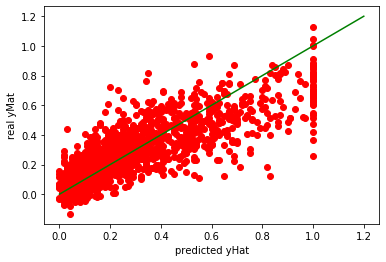

In [20]:
# Plot outputs
%matplotlib inline
pl.plot(yMat, yHat.T, 'ro')
pl.plot([0,1.2],[0,1.2], 'g-')
pl.xlabel('predicted yHat')
pl.ylabel('real yMat')
pl.show()

In [21]:
#obtained regression coefficients (weights).
np.corrcoef(yHat.T, yMat)

array([[1.        , 0.83243652],
       [0.83243652, 1.        ]])

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
# Create linear regression object
linreg = LinearRegression()



In [23]:
from sklearn.model_selection import KFold
# 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE
#(for cross validation, you should use the KFold module from sklearn.cross_validation).
n = 10

kf = KFold(n_splits=n)
kf.get_n_splits(x)

KFold(n_splits=n,random_state=None, shuffle=False)
  

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n
print('training RMSE: ',rmse_train)
print('10-fold Cross Validation RMSE: ',rmse_10cv)

training RMSE:  [[0.12906931]]
10-fold Cross Validation RMSE:  0.13604463989372123


__c. Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]__

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)


In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1595, 97)
(399, 97)
(1595,)
(399,)


In [26]:
from sklearn import feature_selection

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
X_train_fs = fs.fit_transform(x_train, y_train)

In [27]:
#Example to see how the scores and support options show
np.set_printoptions(suppress=True, precision=2, linewidth=90)
print (fs.get_support())
print (fs.scores_)

[ True False  True  True False False False False False False False False  True False
 False  True False  True False  True False False False False False False  True  True
  True  True False  True False False False  True False  True  True False  True  True
  True  True False False  True  True False False False False False False False False
 False False False False False False False False  True  True  True False  True False
  True  True False False  True False False False False False False False False False
 False False  True False False False False False False False False False False]
[ 256.03    3.49 1074.89 1412.51    1.96  137.54    4.89   37.33   15.88    8.25  247.78
   11.06  341.63  161.57   40.34  756.01   22.49  784.57   13.98  366.9   214.99   65.45
  126.58   12.32   29.07   92.37  400.31  578.82  319.22  472.2   173.37  533.91  190.47
    2.61    7.4   602.77  161.08  704.77  693.14   24.47 1657.87 1972.8  1342.17 1299.54
    1.31   36.5   431.64 1936.12  151.62   40.65   70.

1 0.5497462154012411
6 0.609462417806909
11 0.6188591701442954
16 0.6234219314963412
21 0.6341268202083284
26 0.6441994509998603
31 0.6519252369294645
36 0.6525499626379326
41 0.6532826916764792
46 0.6517898644360776
51 0.6510274548846423
56 0.6522696073819919
61 0.6536269426851732
66 0.6538902400001704
71 0.6529207201190571
76 0.6573039134907354
81 0.6568750924901253
86 0.6575702911649393
91 0.6572785315580516
96 0.6579502509649761
Optimal percentile of features:96 

Optimal number of features:92 



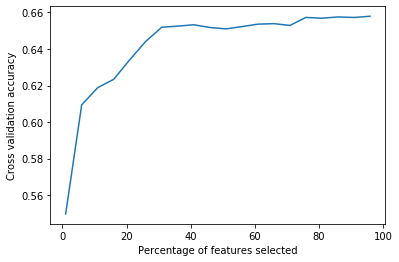

In [28]:
#choosing cv = 5, k = 5
#Script that takes the training data, target variable; 
#the model; and returns the optimal percentage of the most informative features to use
from sklearn import model_selection


percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(x_train, y_train)
    scores = model_selection.cross_val_score(linreg, X_train_fs, y_train, cv=5)#, scoring='neg_mean_squared_error')
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.max())[0]
#print('Percentile:' ,optimal_percentile[0])
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(df.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [29]:
#with the optimal percentile shown above at 92.  The columns and their scores
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 96)
x_train_fs = fs.fit_transform(x_train, y_train)

for i in range(len(df.columns.values)):
    if fs.get_support()[i]:
        print(i, df.columns.values[i],'\t\t\t', fs.scores_[i])

0 population 			 256.0323547372119
1 householdsize 			 3.492519416199985
2 racepctblack 			 1074.8895092675182
3 racePctWhite 			 1412.5078123926182
4 racePctAsian 			 1.959590631102523
5 racePctHisp 			 137.54043215677945
6 agePct12t21 			 4.894803532795885
7 agePct12t29 			 37.33401496511649
8 agePct16t24 			 15.875055643949656
9 agePct65up 			 8.24793840554492
10 numbUrban 			 247.77613854814769
11 pctUrban 			 11.060895847737783
12 medIncome 			 341.63253752319906
13 pctWWage 			 161.57075094157008
14 pctWFarmSelf 			 40.344220298786475
15 pctWInvInc 			 756.0149723312603
16 pctWSocSec 			 22.486379068174298
17 pctWPubAsst 			 784.5706408092585
18 pctWRetire 			 13.975623750024466
19 medFamInc 			 366.90042184405735
20 perCapInc 			 214.99315799069268
21 whitePerCap 			 65.44623454922922
22 blackPerCap 			 126.57709861890363
23 indianPerCap 			 12.31709544455491
24 AsianPerCap 			 29.069227068933138
25 HispPerCap 			 92.36570683066381
26 NumUnderPov 			 400.3078568907944
27 PctPopU

__d. Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]__

In [30]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [32]:
#create a function that takes as input the data and target variable; the parameter to vary and a list of its values; 
#the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter.

def OptimalAlpha(data, target, alpha, k, model, modelprint):
    print(modelprint)
    print('alpha\t RMSE_train\t RMSE_cv\n')
    t_rmse = np.array([])
    cv_rmse = np.array([])
    for a in alpha:
        Model = model(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
        Model.fit(data,target)
        p = Model.predict(data)
        err = p-target
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

    

        kf = KFold(n_splits=k)
        kf.get_n_splits(data)
 
        KFold(n_splits=k,random_state=None, shuffle=False)
   
        xval_err = 0
        for train, test in kf.split(data):
            Model.fit(data[train], target[train])
            p = Model.predict(data[test])
            err = p - target[test]
            xval_err += np.sqrt(np.dot(err,err)/len(data[test]))
        rmse_10cv = xval_err/n
    
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_10cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))
        #print(alpha)
    pl.plot(alpha, t_rmse, label='RMSE_Train')
    pl.plot(alpha, cv_rmse, label='RMSE_CrossVal')
    pl.legend( ('RMSE_Train', 'RMSE_CrossVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

Ridge Regression
alpha	 RMSE_train	 RMSE_cv

0.001	 0.1264		 0.0672
0.527	 0.1272		 0.0667
1.054	 0.1277		 0.0667
1.580	 0.1281		 0.0667
2.106	 0.1284		 0.0667
2.632	 0.1287		 0.0668
3.159	 0.1289		 0.0668
3.685	 0.1291		 0.0669
4.211	 0.1294		 0.0669
4.737	 0.1295		 0.0669
5.264	 0.1297		 0.0670
5.790	 0.1299		 0.0670
6.316	 0.1300		 0.0670
6.842	 0.1301		 0.0671
7.369	 0.1303		 0.0671
7.895	 0.1304		 0.0671
8.421	 0.1305		 0.0672
8.947	 0.1306		 0.0672
9.474	 0.1307		 0.0672
10.000	 0.1308		 0.0672


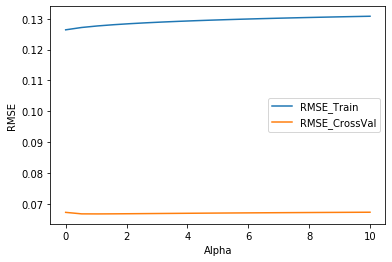

In [33]:
alpha = np.linspace(.001,10,20)
OptimalAlpha(x_train, y_train, alpha, 5, Ridge, 'Ridge Regression')

In [34]:
ridge = Ridge(fit_intercept=True, alpha=1.05)

# Train the model using the training set
ridge.fit(x_test, y_test)

Ridge(alpha=1.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
n = 5
#kf = KFold(len(x), n_folds=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
for train, test in kf.split(x_test):
    ridge.fit(x_test[train],y_test[train])
    p = ridge.predict(x_test[test])
    e = p-y_test[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x_test[test]))
rmse_5cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

KFold(n_splits=5, random_state=None, shuffle=False)
Method: Ridge Regression
RMSE on training: 0.1291
RMSE on 5-fold CV: 0.1555


Lasso Regression
alpha	 RMSE_train	 RMSE_cv

0.001	 0.1338		 0.1356
0.052	 0.2312		 0.2310
0.103	 0.2312		 0.2310
0.154	 0.2312		 0.2310
0.205	 0.2312		 0.2310
0.256	 0.2312		 0.2310
0.307	 0.2312		 0.2310
0.358	 0.2312		 0.2310
0.409	 0.2312		 0.2310
0.460	 0.2312		 0.2310
0.511	 0.2312		 0.2310
0.562	 0.2312		 0.2310
0.613	 0.2312		 0.2310
0.664	 0.2312		 0.2310
0.715	 0.2312		 0.2310
0.766	 0.2312		 0.2310
0.817	 0.2312		 0.2310
0.868	 0.2312		 0.2310
0.919	 0.2312		 0.2310
0.970	 0.2312		 0.2310
1.021	 0.2312		 0.2310
1.072	 0.2312		 0.2310
1.123	 0.2312		 0.2310
1.174	 0.2312		 0.2310
1.225	 0.2312		 0.2310
1.276	 0.2312		 0.2310
1.327	 0.2312		 0.2310
1.378	 0.2312		 0.2310
1.429	 0.2312		 0.2310
1.480	 0.2312		 0.2310
1.531	 0.2312		 0.2310
1.582	 0.2312		 0.2310
1.633	 0.2312		 0.2310
1.684	 0.2312		 0.2310
1.735	 0.2312		 0.2310
1.786	 0.2312		 0.2310
1.837	 0.2312		 0.2310
1.888	 0.2312		 0.2310
1.939	 0.2312		 0.2310
1.990	 0.2312		 0.2310
2.041	 0.2312		 0.2310
2.092	 0.231

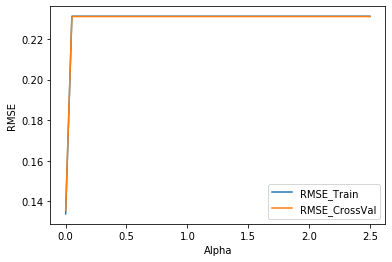

In [36]:
alpha = np.linspace(.001,2.5)
OptimalAlpha(x_train, y_train, alpha, 5, Lasso, 'Lasso Regression')

In [37]:
lasso = Lasso(fit_intercept=True, alpha=0.001)

# Train the model using the training set
lasso.fit(x_test, y_test)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
n = 5
#kf = KFold(len(x), n_folds=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x_test)

print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
for train, test in kf.split(x_test):
    lasso.fit(x_test[train],y_test[train])
    p = lasso.predict(x_test[test])
    e = p-y_test[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x_test[test]))
rmse_5cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

KFold(n_splits=5, random_state=None, shuffle=False)
Method: Ridge Regression
RMSE on training: 0.1291
RMSE on 5-fold CV: 0.1500


*between the two ridge and lasso, we see lasso regression to perform better with the test.  Looking at the plots of the two lasso train and cross validation items fall almost on the same line.  In conclusion, Lasso regression performs better with this data set.*

__e. Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.__

In [39]:
#Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)


In [40]:
#creating randomized 80%-20% train-test split.
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=33)

In [41]:
print('Original', len(x))
print('Training:', x_train.shape)
print('Test:', x_test.shape)
print('Train Target:', y_train.shape)
print('Test Target:', y_test.shape)


Original 1994
Training: (1595, 97)
Test: (399, 97)
Train Target: (1595,)
Test Target: (399,)


In [42]:
#For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) 
#Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha 
#(alpha could vary from 0.0001 which is the default to relatively large values, say 10). 
#Using the best parameters, apply the model to the set-aside test data.

from sklearn.model_selection import GridSearchCV
sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001,10,20)
  }

gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)


%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 1.56 s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6553260101699374)

In [43]:
gs.best_params_, gs.best_score_

({'alpha': 0.0001, 'penalty': 'l1'}, 0.6553260101699374)

In [44]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.0001)

In [45]:
sgdreg.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [46]:
p = sgdreg.predict(x_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=5)
kf.get_n_splits(x_test)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0
for train,test in kf.split(x_test):
    scaler = StandardScaler()
    scaler.fit(x_test[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x_test[train])
    xtest_s = scaler.transform(x_test[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y_test[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_5cv = np.sqrt(xval_err/len(x_test))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1490
RMSE on 5-fold CV: 0.1565


In [47]:
def CalcParam(data, target, alpha, k, model, modelprint):
    print(modelprint)
    print('alpha\t RMSE_train\t RMSE_cv\n')
    t_rmse = np.array([])
    cv_rmse = np.array([])
    for a in alpha:
        Model = model(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
        Model.fit(data,target)
        p = Model.predict(data)
        err = p-target
        total_error = np.dot(err,err)
        rmse_train = np.sqrt(total_error/len(p))

    

        kf = KFold(n_splits=k)
        kf.get_n_splits(data)
 
        KFold(n_splits=k,random_state=None, shuffle=False)
   
        xval_err = 0
        for train, test in kf.split(data):
            Model.fit(data[train], target[train])
            p = Model.predict(data[test])
            err = p - target[test]
            xval_err += np.sqrt(np.dot(err,err)/len(data[test]))
        rmse_10cv = xval_err/n
    
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_10cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))
        #print(alpha)
    pl.plot(alpha, t_rmse, label='RMSE_Train')
    pl.plot(alpha, cv_rmse, label='RMSE_CrossVal')
    pl.legend( ('RMSE_Train', 'RMSE_CrossVal') )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

Elastic Net
alpha	 RMSE_train	 RMSE_cv

0.000	 0.1195		 0.1721
0.051	 0.1489		 0.1545
0.102	 0.1606		 0.1649
0.153	 0.1762		 0.1792
0.204	 0.1927		 0.1940
0.255	 0.2098		 0.2107
0.306	 0.2283		 0.2271
0.357	 0.2394		 0.2369
0.408	 0.2394		 0.2373
0.459	 0.2394		 0.2373
0.510	 0.2394		 0.2373
0.561	 0.2394		 0.2373
0.612	 0.2394		 0.2373
0.663	 0.2394		 0.2373
0.714	 0.2394		 0.2373
0.765	 0.2394		 0.2373
0.816	 0.2394		 0.2373
0.867	 0.2394		 0.2373
0.918	 0.2394		 0.2373
0.969	 0.2394		 0.2373
1.020	 0.2394		 0.2373
1.071	 0.2394		 0.2373
1.123	 0.2394		 0.2373
1.174	 0.2394		 0.2373
1.225	 0.2394		 0.2373
1.276	 0.2394		 0.2373
1.327	 0.2394		 0.2373
1.378	 0.2394		 0.2373
1.429	 0.2394		 0.2373
1.480	 0.2394		 0.2373
1.531	 0.2394		 0.2373
1.582	 0.2394		 0.2373
1.633	 0.2394		 0.2373
1.684	 0.2394		 0.2373
1.735	 0.2394		 0.2373
1.786	 0.2394		 0.2373
1.837	 0.2394		 0.2373
1.888	 0.2394		 0.2373
1.939	 0.2394		 0.2373
1.990	 0.2394		 0.2373
2.041	 0.2394		 0.2373
2.092	 0.2394		 0

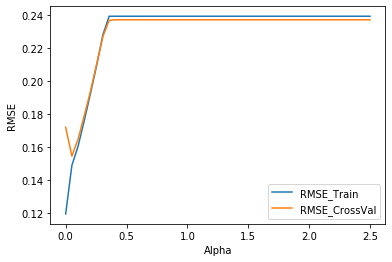

In [48]:
alpha = np.linspace(0.0001,2.5)
CalcParam(x_test, y_test, alpha, 5, ElasticNet, 'Elastic Net')

*from the above trails of different methods. Elastic net, and lasso perform best with this data set.*